In [33]:
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

print("GPU", "available " if tf.config.list_physical_devices("GPU") else "not available")

TF version: 2.10.1
TF Hub version: 0.14.0
GPU available 


In [8]:
!nvidia-smi

Sat Sep  9 00:45:32 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.13                 Driver Version: 537.13       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   46C    P8              11W / 130W |      0MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Getting out Data Ready

In [9]:
import pandas as pd

labels_csv = pd.read_csv("data/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [10]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<Axes: xlabel='breed'>

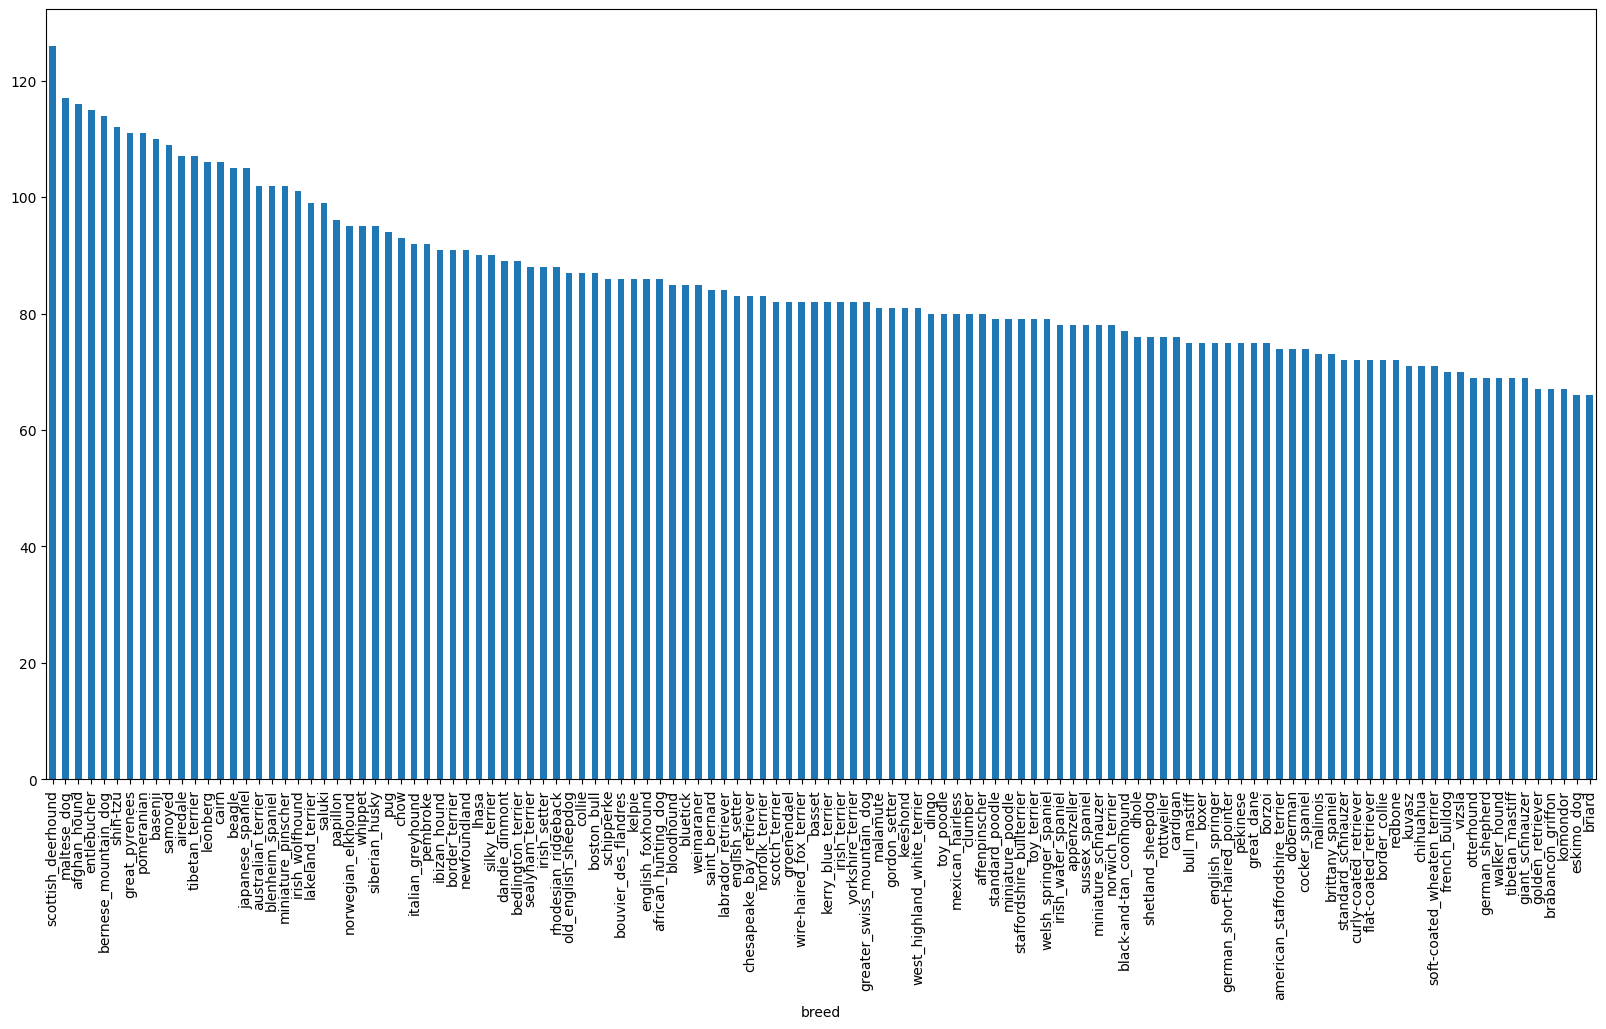

In [11]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [12]:
labels_csv["breed"].value_counts().median()

82.0

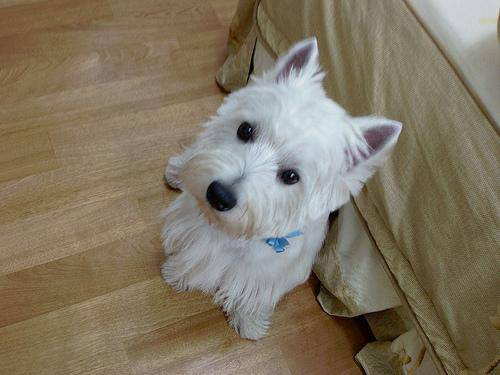

In [13]:
# Image from train dataset

from IPython.display import Image
Image("data/train/0a27d304c96918d440e79e6e9e245c3f.jpg")

In [14]:
# Create pathnames from image IDs

filenames = ["data/train/" + fname + ".jpg" for fname in labels_csv["id"]]

In [15]:
filenames[:10]

['data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [17]:
# Check whether number of filenames matches the number of actual image files

if len(os.listdir("data/train")) == len(filenames):
    print("Filename match actual amount of file!! Proceed...")
else:
    print("Filenames do not match actual amount of files, check the target directory")

Filename match actual amount of file!! Proceed...


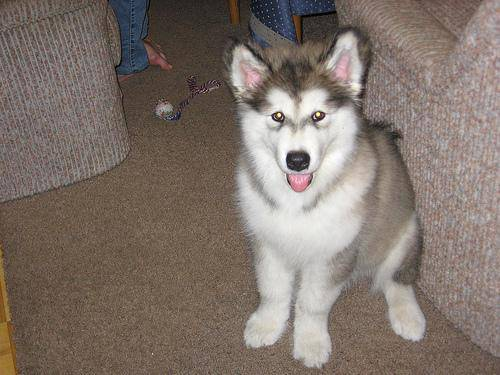

In [19]:
Image(filenames[3000])

In [20]:
labels_csv["breed"][3000]

'malamute'

In [21]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [22]:
len(labels)

10222

In [24]:
# See if numbers of labels matches the number of filenames

if len(labels) == len(filenames):
    print("Number of labels matched number of filenames!")
else:
    print("Number of labels doesn't match number of filenames, check data directories!")

Number of labels matched number of filenames!


In [26]:
# Unique label values

unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [28]:
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [29]:
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [30]:
len(boolean_labels)

10222

### Creating own Validation Set

In [31]:
x = filenames
y = boolean_labels

In [35]:
NUM_IMAGES = 1000 

In [38]:
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.25,
                                                  random_state=2)
len(x_train), len(y_train), len(x_val), len(y_val)

(750, 750, 250, 250)

In [39]:
x_train[:5], y_train[:2]

(['data/train/106d7e0df869e7ba9f6d16c5f77ddfb8.jpg',
  'data/train/0294b42910cb8a8d8340e45d8aaf2953.jpg',
  'data/train/15f8b879f8660fece35ed760345fa9dd.jpg',
  'data/train/0a86c8b48bddb0155645f3a27f48292f.jpg',
  'data/train/0a7899ed6a15f4af8f28e01c9c44dcfe.jpg'],
 [array([ True, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False

## Preprocessing Images

In [41]:
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [42]:
image.max(), image.min()

(255, 0)

In [43]:
image[:2]

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)

In [46]:
# Turning images into tensors

IMG_SIZE = 224

def process_image (image_path, img_size=IMG_SIZE):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    
    return image

In [47]:
def get_image_label(image_path, label):
    image = process_image(image_path)
    return image, label

In [48]:
BATCH_SIZE = 32

def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices(tf.constant(x))
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    
    elif valid_data:
        print("Creating Validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                                  tf.constant(y)))
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    
    else:
        print("Creating training data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                                  tf.constant(y)))
        data = data.shuffle(buffer_size=len(x))
        data = data.map(get_image_label)
        data_batch = data.batch(BATCH_SIZE)
    
    return data_batch

In [49]:
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_train, y_train, valid_data=True)

Creating training data batches...
Creating Validation data batches...


In [50]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualising Data Batches

In [51]:
import matplotlib.pyplot as plt

def show_25_images(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
      ax = plt.subplot(5, 5, i+1)
      plt.imshow(images[i])
      plt.title(unique_breeds[labels[i].argmax()])
      plt.axis("off")

In [53]:
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), len(train_labels)

(32, 32)

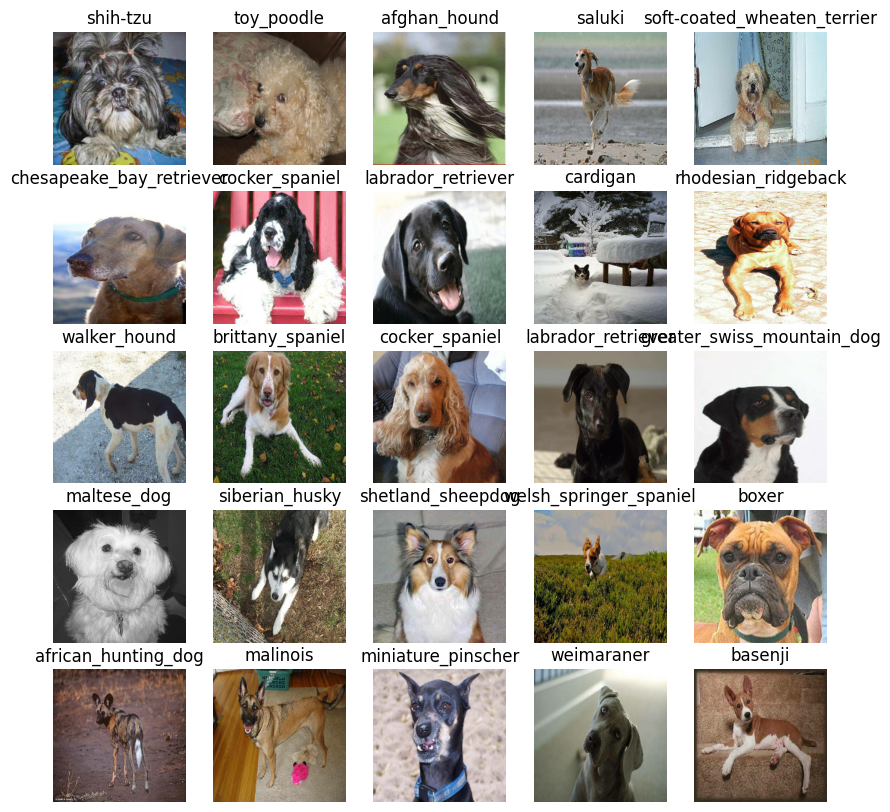

In [55]:
# training batch

show_25_images(train_images, train_labels)

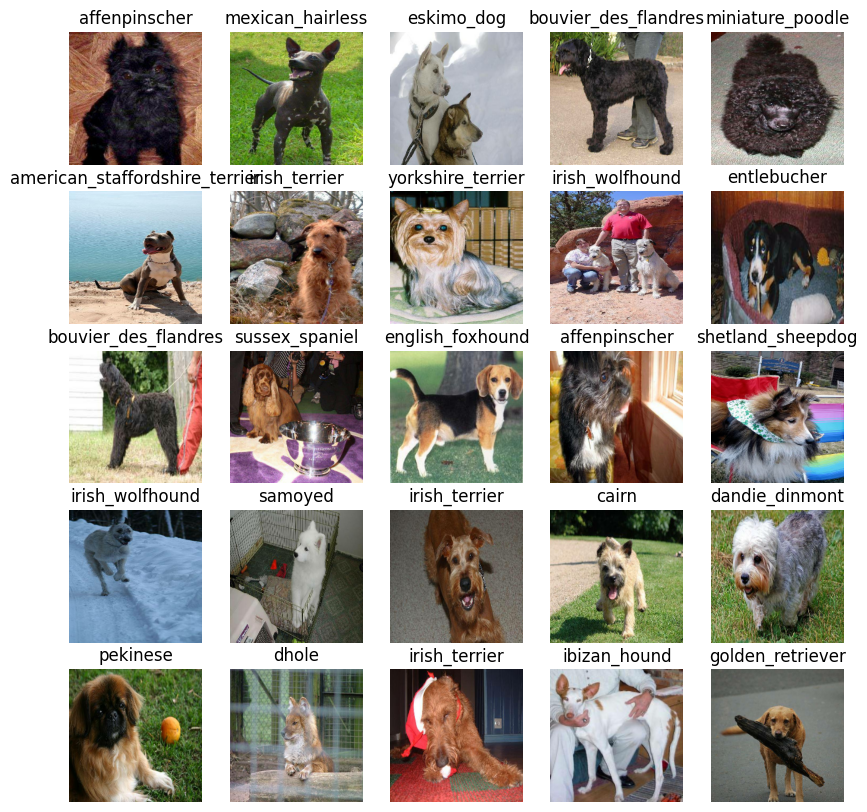

In [56]:
# validation batch

val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Model Building

In [57]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]
OUTPUT_SHAPE = len(unique_breeds)
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [58]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print("Building model with: ", MODEL_URL)
    
    model = tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL),
        tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                              activation="softmax")
    ])
    
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )
    
    model.build(INPUT_SHAPE)
    
    return model

In [59]:
model = create_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### Creating Callbacks
Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

In [60]:
%load_ext tensorboard

In [61]:
import datetime
def create_tensorboard_callback():
    logdir = os.path.join("./logs",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)

In [64]:
# early stopping callback

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=5)

In [65]:
NUM_EPOCHS = 100

In [66]:
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not")

GPU available


### Training Model on Validation Set

In [69]:
def train_model():
    model = create_model()
    tensorboard = create_tensorboard_callback()
    model.fit(x=train_data,
              epochs=NUM_EPOCHS,
              validation_data=val_data,
              validation_freq=1,
              callbacks=[tensorboard, early_stopping])
    return model

In [70]:
model = train_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
24/24 [==============================] - 10s 99ms/step - loss: 4.5086 - accuracy: 0.0760 - val_loss: 2.2958 - val_accuracy: 0.5253
Epoch 2/100
24/24 [==============================] - 2s 77ms/step - loss: 1.6199 - accuracy: 0.6960 - val_loss: 0.7355 - val_accuracy: 0.9360
Epoch 3/100
24/24 [==============================] - 2s 77ms/step - loss: 0.5553 - accuracy: 0.9533 - val_loss: 0.2884 - val_accuracy: 0.9893
Epoch 4/100
24/24 [==============================] - 2s 74ms/step - loss: 0.2366 - accuracy: 0.9893 - val_loss: 0.1525 - val_accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 2s 73ms/step - loss: 0.1373 - accuracy: 1.0000 - val_loss: 0.1011 - val_accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 2s 72ms/step - loss: 0.0940 - accuracy: 1.0000 - val_loss: 0.0744 - val_accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 

In [71]:
%tensorboard --logdir ./logs

In [72]:
# prediction on validation trained model

predictions = model.predict(val_data, verbose=1)
predictions

24/24 [==============================] - 1s 41ms/step


array([[9.82503712e-01, 2.67892278e-06, 5.61526576e-06, ...,
        1.21948119e-06, 3.99255587e-05, 9.41977836e-04],
       [5.24887255e-05, 2.83864611e-05, 8.65721318e-04, ...,
        4.89821075e-04, 8.48923207e-07, 3.02334010e-05],
       [1.25746203e-06, 8.49311691e-05, 2.79308937e-04, ...,
        3.34329670e-03, 3.00851098e-04, 6.89121407e-06],
       ...,
       [1.44877849e-04, 5.76947496e-05, 1.77586353e-05, ...,
        3.40293991e-06, 7.35991489e-05, 2.05189008e-06],
       [1.71660831e-05, 2.45729188e-05, 1.08665688e-06, ...,
        2.04120261e-06, 3.85576102e-04, 1.21781435e-04],
       [3.10749383e-05, 6.16237521e-05, 1.51023696e-05, ...,
        5.36542619e-04, 6.70953421e-04, 1.04477658e-05]], dtype=float32)

In [73]:
predictions[0]

array([9.82503712e-01, 2.67892278e-06, 5.61526576e-06, 6.94757637e-06,
       3.32500008e-06, 8.81903134e-07, 3.63017258e-04, 5.41626889e-07,
       2.61242690e-06, 2.67871337e-06, 3.53369705e-06, 7.90193008e-05,
       1.50196502e-05, 1.12696718e-04, 2.07586004e-06, 8.93218657e-06,
       6.31388230e-06, 9.16653487e-04, 6.24932227e-06, 4.76104378e-06,
       1.19307498e-03, 2.76795854e-05, 5.09348884e-03, 9.20921957e-05,
       1.02615286e-05, 8.02318664e-06, 7.55981426e-04, 3.37602137e-06,
       3.19298778e-07, 3.59717633e-05, 6.02718865e-05, 3.60225886e-06,
       3.53760006e-05, 5.53017856e-07, 2.32792559e-06, 4.92412000e-05,
       4.03027989e-05, 2.10780013e-06, 6.01190368e-06, 3.41599275e-06,
       6.32007243e-07, 6.19987350e-06, 1.24380608e-06, 1.67522273e-07,
       1.76789345e-05, 5.47893287e-05, 7.99441568e-06, 1.24373910e-05,
       1.92798310e-04, 1.92000675e-06, 5.40851306e-06, 1.82903705e-06,
       8.79410800e-06, 7.82986717e-06, 3.35169549e-04, 4.12535337e-06,
      

In [74]:
predictions.shape

(750, 120)

In [75]:
index = 0
print(predictions[index])
print(f"Max Value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[9.82503712e-01 2.67892278e-06 5.61526576e-06 6.94757637e-06
 3.32500008e-06 8.81903134e-07 3.63017258e-04 5.41626889e-07
 2.61242690e-06 2.67871337e-06 3.53369705e-06 7.90193008e-05
 1.50196502e-05 1.12696718e-04 2.07586004e-06 8.93218657e-06
 6.31388230e-06 9.16653487e-04 6.24932227e-06 4.76104378e-06
 1.19307498e-03 2.76795854e-05 5.09348884e-03 9.20921957e-05
 1.02615286e-05 8.02318664e-06 7.55981426e-04 3.37602137e-06
 3.19298778e-07 3.59717633e-05 6.02718865e-05 3.60225886e-06
 3.53760006e-05 5.53017856e-07 2.32792559e-06 4.92412000e-05
 4.03027989e-05 2.10780013e-06 6.01190368e-06 3.41599275e-06
 6.32007243e-07 6.19987350e-06 1.24380608e-06 1.67522273e-07
 1.76789345e-05 5.47893287e-05 7.99441568e-06 1.24373910e-05
 1.92798310e-04 1.92000675e-06 5.40851306e-06 1.82903705e-06
 8.79410800e-06 7.82986717e-06 3.35169549e-04 4.12535337e-06
 7.93851723e-05 8.10663332e-05 1.02637305e-05 8.35194805e-06
 1.46809384e-06 4.36333976e-05 3.22178821e-04 9.52452592e-06
 3.59458754e-05 1.201499

In [76]:
def get_pred_label(prediction_probabilities):
    return unique_breeds[np.argmax(prediction_probabilities)]

pred_label = get_pred_label(predictions[81])
pred_label

'kuvasz'

In [77]:
def unbatchify(data):
    images = []
    labels = []
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
    return images, labels

val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.3631983 , 0.15535516, 0.09444071],
         [0.38638663, 0.17255254, 0.11283877],
         [0.40021873, 0.1708376 , 0.11814442],
         ...,
         [0.57155323, 0.32951567, 0.22200473],
         [0.5894819 , 0.3614181 , 0.27178484],
         [0.5861695 , 0.36078432, 0.2734769 ]],
 
        [[0.32273638, 0.11763922, 0.06529589],
         [0.30160773, 0.08868845, 0.03615868],
         [0.36996204, 0.14361823, 0.09800822],
         ...,
         [0.5969886 , 0.39781585, 0.2863002 ],
         [0.5960908 , 0.38529325, 0.28446162],
         [0.6017305 , 0.38832015, 0.28882784]],
 
        [[0.2768426 , 0.07512401, 0.03357989],
         [0.32016423, 0.11356406, 0.06640895],
         [0.4348892 , 0.21490343, 0.17114772],
         ...,
         [0.574146  , 0.4233352 , 0.30836672],
         [0.59948796, 0.4168418 , 0.29765406],
         [0.62228906, 0.4258096 , 0.3148587 ]],
 
        ...,
 
        [[0.4450809 , 0.21807632, 0.1618351 ],
         [0.43682903, 0.21463886, 0.13993

In [78]:
def plot_pred(prediction_probabilities, labels, images, n=1):
    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
    pred_label = get_pred_label(pred_prob)
    
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
        
    plt.title("{} {:2.0f}% {}".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

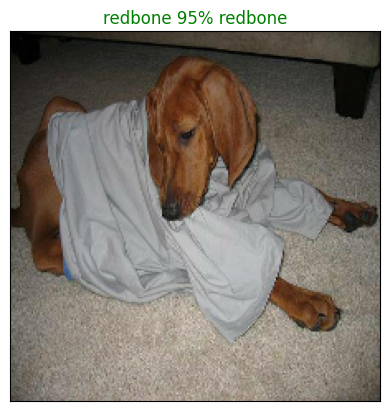

In [79]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=45)

In [80]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
    pred_prob, true_label = prediction_probabilities[n], labels[n]
    pred_label = get_pred_label(pred_prob)
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                       top_10_pred_values,
                       color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
               labels=top_10_pred_labels,
               rotation="vertical")
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
        pass

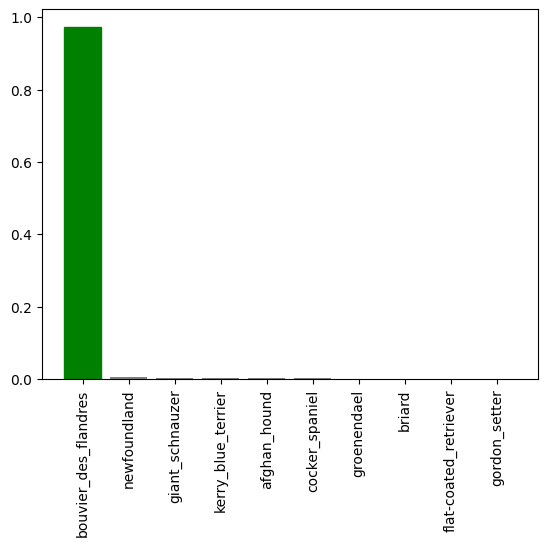

In [81]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=10)

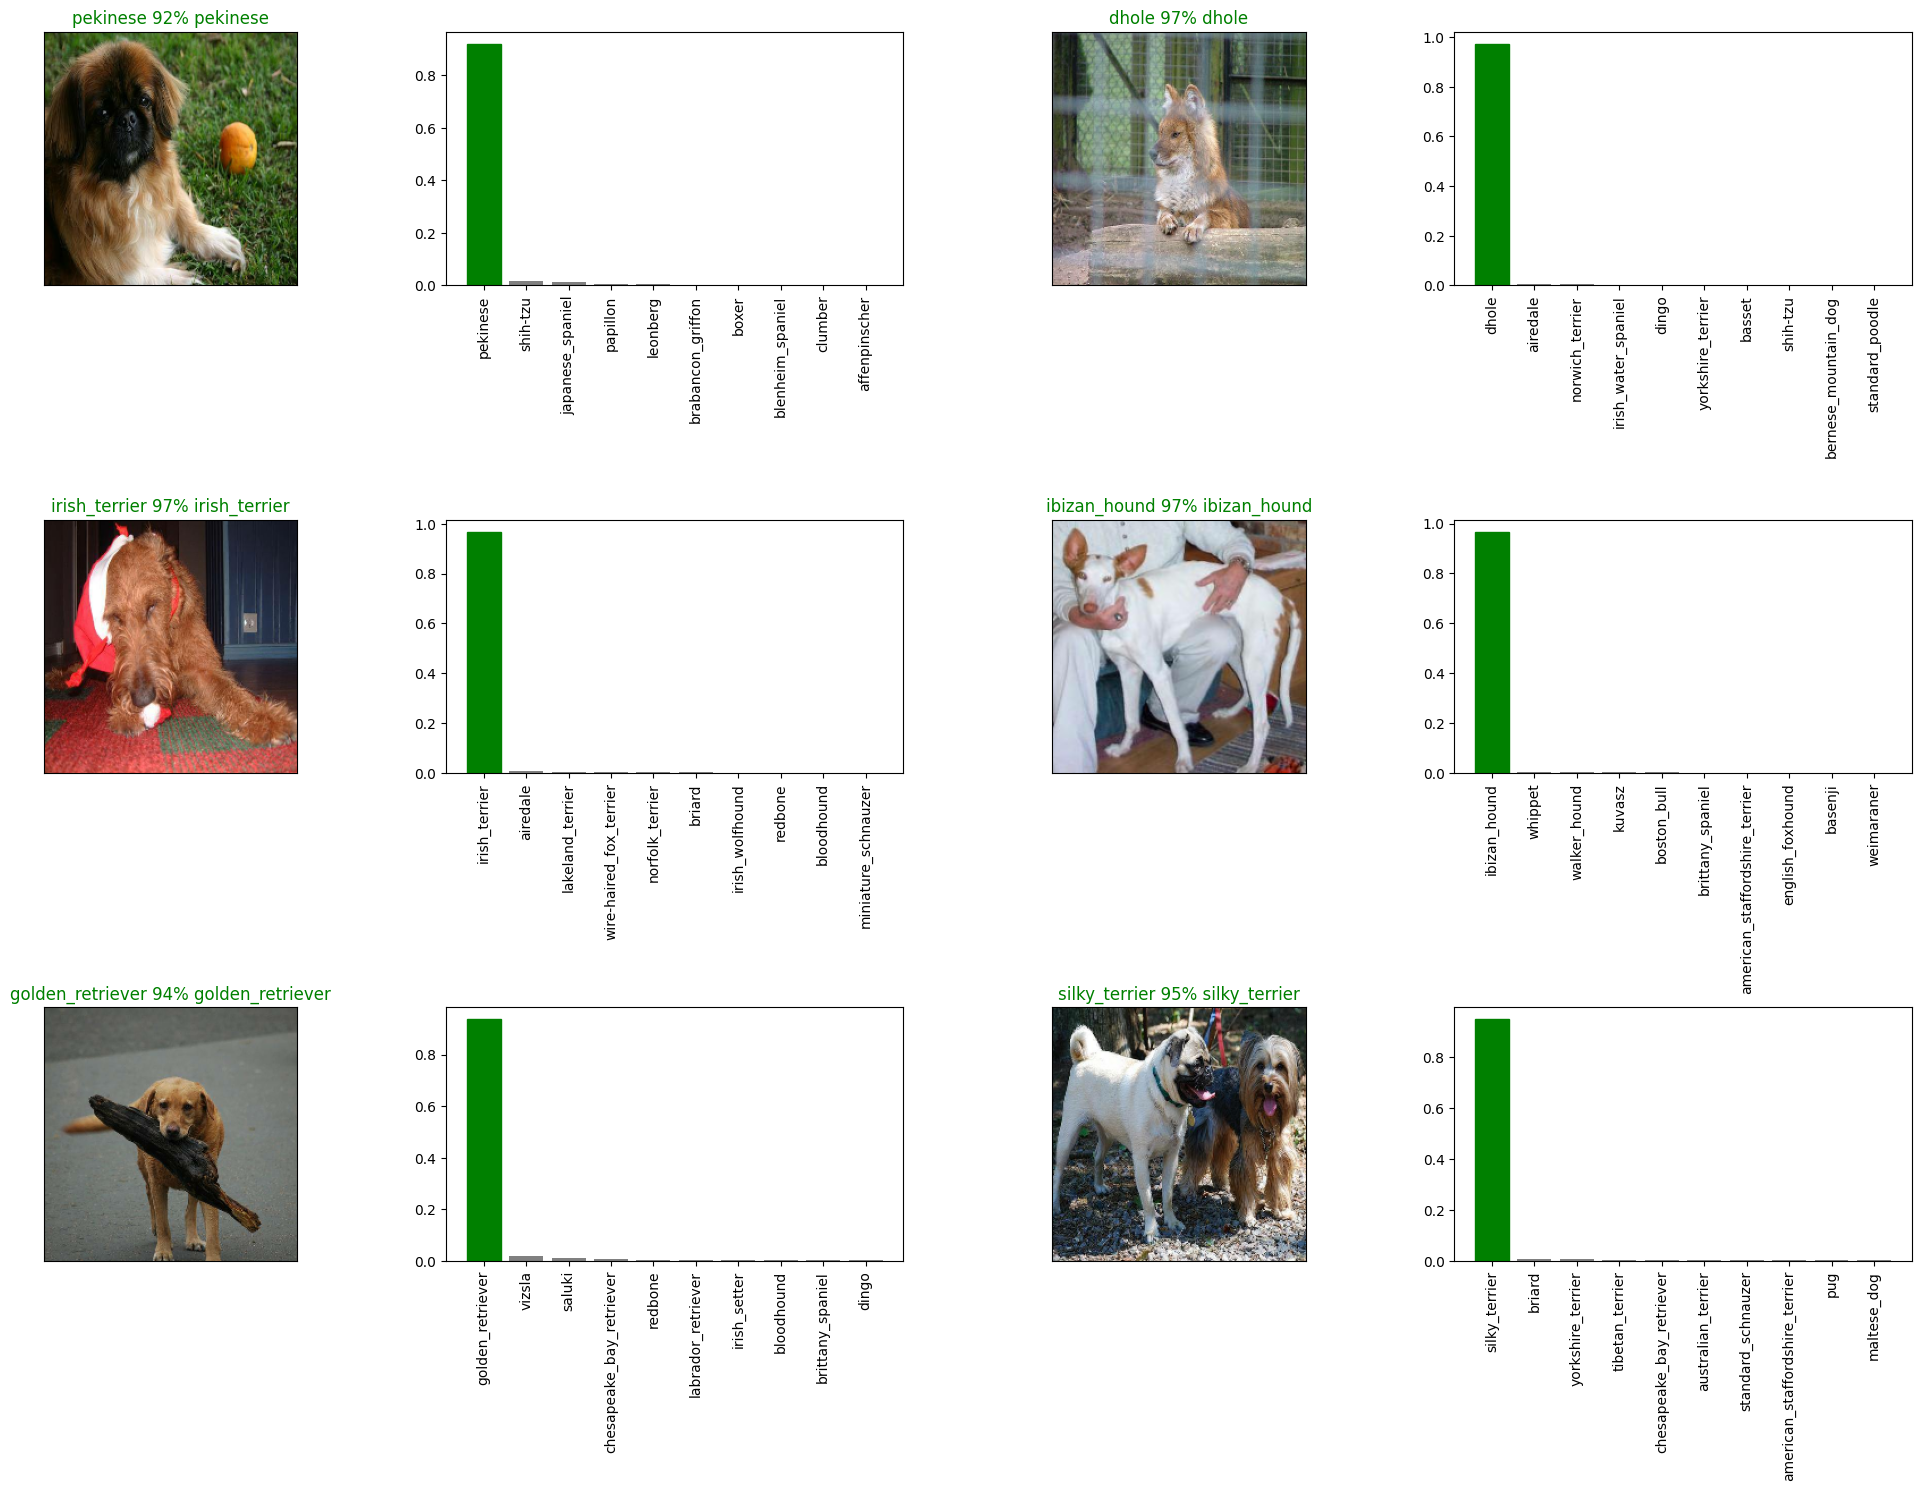

In [82]:
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_pred(prediction_probabilities=predictions,
              labels=val_labels,
              images=val_images,
              n=i+i_multiplier)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_pred_conf(prediction_probabilities=predictions,
                   labels=val_labels,
                   n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [83]:
def save_model(model, suffix=None):
    modeldir = os.path.join("./models",
                            datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    model_path = modeldir + "-" + suffix + ".h5"
    print(f"saving model to: {model_path}...")
    model.save(model_path)
    return model_path

In [84]:
def load_model(model_path):
    print(f"Loading saved model from: {model_path}")
    model = tf.keras.models.load_model(model_path,
                                       custom_objects={"KerasLayer": hub.KerasLayer})
    return model

In [85]:
save_model(model, suffix="1000-images-mobilenetv2-Adam")

saving model to: ./models\20230909-010610-1000-images-mobilenetv2-Adam.h5...


'./models\\20230909-010610-1000-images-mobilenetv2-Adam.h5'

In [86]:
loaded_1000_image_model = load_model("./models/20220930-165939-1000-images-mobilenetv2-Adam.h5")

Loading saved model from: ./models/20220930-165939-1000-images-mobilenetv2-Adam.h5


In [87]:
model.evaluate(val_data)

24/24 [==============================] - 1s 37ms/step - loss: 0.0402 - accuracy: 1.0000


[0.040240589529275894, 1.0]

### Training on full data

In [93]:
len(x), len(y)

(10222, 10222)

In [94]:
full_data = create_data_batches(x, y)

Creating training data batches...


In [95]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [96]:
full_model = create_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [97]:
full_model_tensorboard = create_tensorboard_callback()

full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=5)

In [98]:
%time

full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/100
320/320 [==============================] - 16s 42ms/step - loss: 1.3462 - accuracy: 0.6689
Epoch 2/100
320/320 [==============================] - 12s 38ms/step - loss: 0.3992 - accuracy: 0.8804
Epoch 3/100
320/320 [==============================] - 12s 36ms/step - loss: 0.2371 - accuracy: 0.9342
Epoch 4/100
320/320 [==============================] - 11s 35ms/step - loss: 0.1538 - accuracy: 0.9630
Epoch 5/100
320/320 [==============================] - 11s 35ms/step - loss: 0.1043 - accuracy: 0.9787
Epoch 6/100
320/320 [==============================] - 11s 36ms/step - loss: 0.0772 - accuracy: 0.9865
Epoch 7/100
320/320 [==============================] - 11s 35ms/step - loss: 0.0585 - accuracy: 0.9922
Epoch 8/100
320/320 [==============================] - 12s 37ms/step - loss: 0.0465 - accuracy: 0.9949
Epoch 9/100
320/320 [==============================] - 11s 35ms/step - loss: 0.0364 - accuracy: 0.9971
Epoch 10/100
320/320 [============

In [99]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

saving model to: ./models\20230909-011124-full-image-set-mobilenetv2-Adam.h5...


'./models\\20230909-011124-full-image-set-mobilenetv2-Adam.h5'

In [100]:
loaded_full_model = load_model("./models/20220930-171602-full-image-set-mobilenetv2-Adam.h5")

Loading saved model from: ./models/20220930-171602-full-image-set-mobilenetv2-Adam.h5


### Prediction on Test dataset

In [102]:
test_path = "data/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['data/test/000621fb3cbb32d8935728e48679680e.jpg',
 'data/test/00102ee9d8eb90812350685311fe5890.jpg',
 'data/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'data/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'data/test/001a5f3114548acdefa3d4da05474c2e.jpg',
 'data/test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 'data/test/002c2a3117c2193b4d26400ce431eebd.jpg',
 'data/test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 'data/test/002f80396f1e3db687c5932d7978b196.jpg',
 'data/test/0036c6bcec6031be9e62a257b1c3c442.jpg']

In [103]:
len(test_filenames)

10357

In [104]:
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [105]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [106]:
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 14s 41ms/step


In [108]:
# Save predictions (NumPy Array) to csv file

np.savetxt("./preds_array.csv", test_predictions, delimiter=",")

In [109]:
# Load predictions (Numpy array) from csv file

test_predictions = np.loadtxt("./preds_array.csv", delimiter=",")

In [110]:
test_predictions.shape

(10357, 120)

#### Preparing test dataset predictions for Kaggle

In [112]:
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [113]:
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [114]:
preds_df.head()

id affenpinscher afghan_hound  \
0  000621fb3cbb32d8935728e48679680e           NaN          NaN   
1  00102ee9d8eb90812350685311fe5890           NaN          NaN   
2  0012a730dfa437f5f3613fb75efcd4ce           NaN          NaN   
3  001510bc8570bbeee98c8d80c8a95ec1           NaN          NaN   
4  001a5f3114548acdefa3d4da05474c2e           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [115]:
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e   1.556846e-13  4.032716e-14   
1  00102ee9d8eb90812350685311fe5890   1.016112e-07  2.062413e-08   
2  0012a730dfa437f5f3613fb75efcd4ce   1.067910e-14  2.674826e-10   
3  001510bc8570bbeee98c8d80c8a95ec1   3.746579e-08  1.175131e-12   
4  001a5f3114548acdefa3d4da05474c2e   6.199064e-06  4.799601e-07   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         1.906206e-15  6.462575e-15                    1.567052e-15   
1         1.061410e-09  1.838180e-11                    2.405115e-08   
2         1.253850e-14  2.011556e-15                    8.905552e-15   
3         1.281327e-08  3.695379e-09                    3.295721e-09   
4         1.671785e-11  1.241684e-13                    7.417384e-12   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  5.570017e-14        1.235799e-19  1.925215e-14  3.831976e-14  ...   
1  1.133588e-10        4.412400e-08  1.507895e-09  5.262766e-10  ...   
2  1.020680e-10        4.865578e-17  1.575867e-16  8.171948e-14  ...   
3  1.038967e-09        1.231110e-17  8.951886e-16  3.005346e-10  ...   
4  5.514583e-15        1.182649e-13  1.224324e-09  7.703419e-12  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  8.903423e-15  1.776277e-16  2.608684e-17  2.747553e-17  2.883544e-17   
1  8.962325e-11  4.143493e-08  1.055238e-11  5.028154e-08  2.594106e-10   
2  3.468715e-16  5.953619e-15  1.542790e-12  2.314676e-09  4.803076e-11   
3  4.038864e-09  8.533906e-12  1.377798e-08  1.155147e-14  1.365018e-11   
4  7.044794e-10  5.982194e-13  1.240251e-14  1.676416e-13  1.158949e-13   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            5.257702e-16                 6.865818e-16  8.734408e-16   
1            5.733145e-10                 1.709901e-05  8.187182e-15   
2            5.581633e-11                 5.348826e-18  5.050240e-10   
3            3.795087e-10                 1.451346e-21  5.475310e-01   
4            3.481396e-11                 1.698080e-14  5.013502e-09   

   wire-haired_fox_terrier  yorkshire_terrier  
0             2.021609e-11       3.994605e-12  
1             1.190633e-09       2.285295e-13  
2             1.130372e-14       3.338160e-16  
3             1.238946e-14       1.491904e-09  
4             1.426137e-12       5.193316e-10  

[5 rows x 121 columns]

In [116]:
preds_df.to_csv("./full_model_predictions_submission_1.csv",
                index=False)

### Prediction on our Custom Images

In [124]:
# Get the custom image filepath

custom_path = "./my-dog-photos/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [125]:
custom_image_paths

['./my-dog-photos/1.jpg',
 './my-dog-photos/2.jpg',
 './my-dog-photos/3.jpg',
 './my-dog-photos/4.jpg',
 './my-dog-photos/5.jpg']

In [126]:
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [132]:
# Make predictions on the custom data

custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 0s 77ms/step


In [128]:
custom_preds.shape

(5, 120)

In [133]:
# Get custom image prediction labels

custom_preds_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_preds_labels

['german_shepherd', 'golden_retriever', 'pug', 'chihuahua', 'siberian_husky']

In [130]:
custom_images = []
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

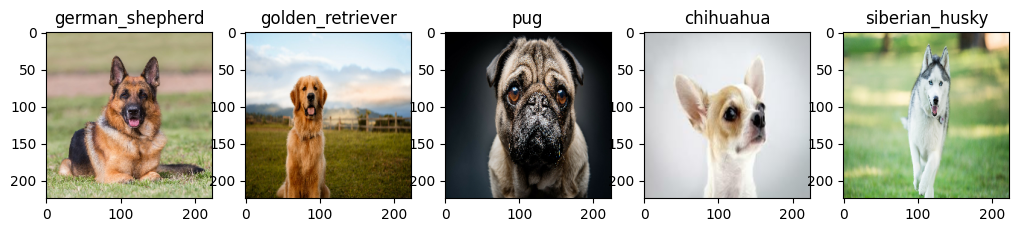

In [131]:
plt.figure(figsize=(15,15))
for i, image in enumerate(custom_images):
  plt.subplot(3, 6, i+1)
  plt.xticks()
  plt.yticks()
  plt.title(custom_preds_labels[i])
  plt.imshow(image)